## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [3]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


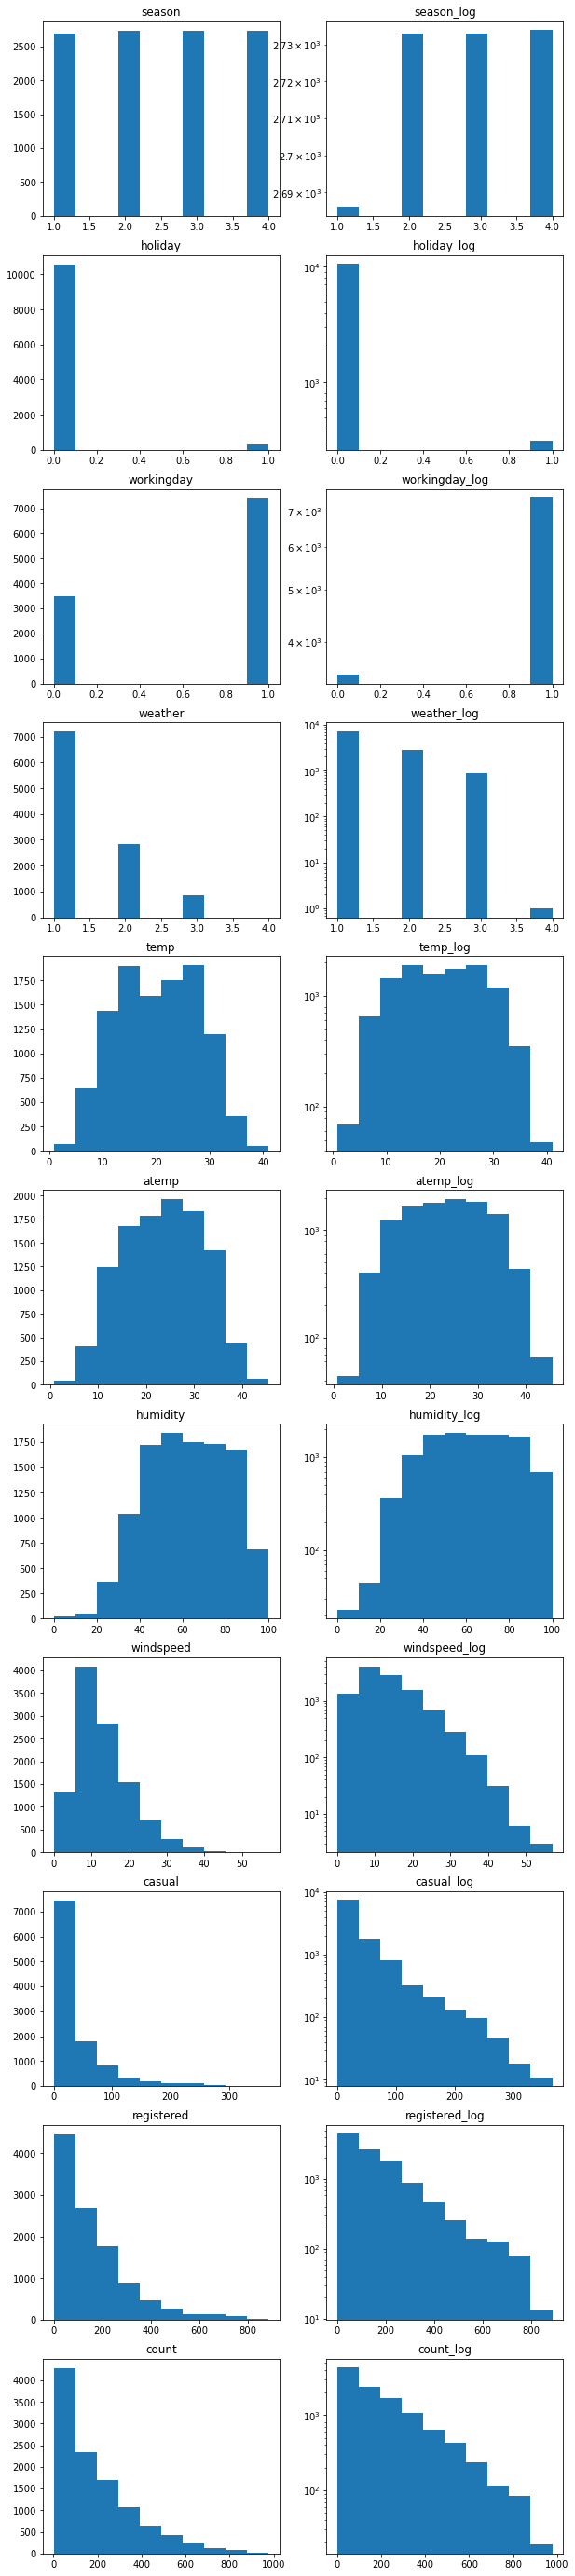

In [4]:
#for i in df.columns:
#    sns.distplot(df[i])
n = len(df.columns)    
fig, axs = plt.subplots(n, 2, figsize=(10, 50))

for i in range(n):
    axs[i, 0].hist(df[df.columns[i]])
    axs[i, 1].hist(df[df.columns[i]], log=True)
    axs[i, 0].set_title(df.columns[i])
    axs[i, 1].set_title(str(df.columns[i])+"_log")

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [20]:
### YOUR CODE HERE ###
def my_basic_research(df=df):
#     n = df.columns    
#     fig, axs = plt.subplots(n, 1, figsize=(10, 50))

    for i in df.columns:
        print('Метрика: '+str(i))
        print('Cреднее: '+str(df[i].mean()))
        print('Дисперсия: '+str(df[i].var()))
        print('Квантиль - медиана : '+str(np.percentile(df[i], 50)))
        print('Кванталь - 0.75: '+str(np.percentile(df[i], 75)))
        print('Перцентиль 0.99: '+str(np.percentile(df[i], 99)))
        print("------------------------------------")

        print("Самые популярные значения метрики, топ 5")
        print(df[i].value_counts().nlargest(5))
        print("------------------------------------")

        print("Эксцесс ", kurtosis(df[i]))
        print("Ассиметрия ", skew(df[i]))
        
        print("")
        print("")
        print("")
        print("")
# #         sns.distplot(df[i])
#         plt.title("Распределение по ")
#         axs[i, 0].hist(df[df.columns[i]])
#         axs[i, 0].set_title(df.columns[i])
    
    


In [21]:
my_basic_research(df=df)

Метрика: season
Cреднее: 2.5066139996325556
Дисперсия: 1.2458450888401458
Квантиль - медиана : 3.0
Кванталь - 0.75: 4.0
Перцентиль 0.99: 4.0
------------------------------------
Самые популярные значения метрики, топ 5
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
------------------------------------
Эксцесс  -1.3555899543299803
Ассиметрия  -0.007074695296526289




Метрика: holiday
Cреднее: 0.02856880396839978
Дисперсия: 0.02775517702947772
Квантиль - медиана : 0.0
Кванталь - 0.75: 0.0
Перцентиль 0.99: 1.0
------------------------------------
Самые популярные значения метрики, топ 5
0    10575
1      311
Name: holiday, dtype: int64
------------------------------------
Эксцесс  30.032624417535125
Ассиметрия  5.6597371332540805




Метрика: workingday
Cреднее: 0.6808745177291935
Дисперсия: 0.21730437065606645
Квантиль - медиана : 1.0
Кванталь - 0.75: 1.0
Перцентиль 0.99: 1.0
------------------------------------
Самые популярные значения метрики, топ 5
1    7412
0   

In [8]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [5]:
### YOUR CODE HERE ###



### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [6]:
### YOUR CODE HERE ###



### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [7]:
### YOUR CODE HERE ###



### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [8]:
### YOUR CODE HERE ###

